## Machine learning project - Air pollution project

In [34]:
# Import libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

RSEED = 42

In [2]:
# Import data
air_pollution = pd.read_csv("data/Train.csv")

In [3]:
# Check data
air_pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 82 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      30557 non-null  object 
 1   Date                                                 30557 non-null  object 
 2   Place_ID                                             30557 non-null  object 
 3   target                                               30557 non-null  float64
 4   target_min                                           30557 non-null  float64
 5   target_max                                           30557 non-null  float64
 6   target_variance                                      30557 non-null  float64
 7   target_count                                         30557 non-null  int64  
 8   precipitable_water_entire_atmosphere                 30557 non-nul

In [4]:
# Check data for nan's
nan_count = air_pollution.isna().sum()
nan_percent = air_pollution.isna().sum()/len(air_pollution)*100

pd.options.display.max_rows = 4000
#print(nan_count)
print(nan_percent)

Place_ID X Date                                         0.000000
Date                                                    0.000000
Place_ID                                                0.000000
target                                                  0.000000
target_min                                              0.000000
target_max                                              0.000000
target_variance                                         0.000000
target_count                                            0.000000
precipitable_water_entire_atmosphere                    0.000000
relative_humidity_2m_above_ground                       0.000000
specific_humidity_2m_above_ground                       0.000000
temperature_2m_above_ground                             0.000000
u_component_of_wind_10m_above_ground                    0.000000
v_component_of_wind_10m_above_ground                    0.000000
L3_NO2_NO2_column_number_density                        7.163661
L3_NO2_NO2_slant_column_n

## Data preprocessing

In [5]:
# Data cleaning
drop_features = [
'Place_ID X Date', 
'Date', 
'Place_ID', 
'target', 
'target_min', 
'target_max', 
'target_variance', 
'target_count', 
'L3_NO2_sensor_altitude', 
'L3_NO2_sensor_azimuth_angle', 
'L3_NO2_sensor_zenith_angle', 
'L3_NO2_solar_azimuth_angle', 
'L3_NO2_solar_zenith_angle', 
'L3_O3_sensor_azimuth_angle', 
'L3_O3_sensor_zenith_angle', 
'L3_O3_solar_azimuth_angle', 
'L3_O3_solar_zenith_angle', 
'L3_CO_sensor_altitude',
'L3_CO_sensor_azimuth_angle',
'L3_CO_sensor_zenith_angle',
'L3_CO_solar_azimuth_angle',
'L3_CO_solar_zenith_angle',
'L3_HCHO_solar_azimuth_angle',
'L3_HCHO_solar_zenith_angle',
'L3_HCHO_sensor_azimuth_angle',
'L3_HCHO_sensor_zenith_angle',
'L3_AER_AI_sensor_altitude',
'L3_AER_AI_sensor_azimuth_angle',
'L3_AER_AI_sensor_zenith_angle',
'L3_AER_AI_solar_azimuth_angle',
'L3_AER_AI_solar_zenith_angle',
'L3_CLOUD_sensor_azimuth_angle',
'L3_CLOUD_sensor_zenith_angle',
'L3_CLOUD_solar_azimuth_angle',
'L3_CLOUD_solar_zenith_angle',
'L3_SO2_sensor_azimuth_angle',
'L3_SO2_sensor_zenith_angle',
'L3_SO2_solar_azimuth_angle',
'L3_SO2_solar_zenith_angle',
'L3_CH4_CH4_column_volume_mixing_ratio_dry_air',
'L3_CH4_aerosol_height',
'L3_CH4_aerosol_optical_depth',
'L3_CH4_sensor_azimuth_angle',
'L3_CH4_sensor_zenith_angle',
'L3_CH4_solar_azimuth_angle',
'L3_CH4_solar_zenith_angle']

df = air_pollution.drop(drop_features, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 36 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   precipitable_water_entire_atmosphere                 30557 non-null  float64
 1   relative_humidity_2m_above_ground                    30557 non-null  float64
 2   specific_humidity_2m_above_ground                    30557 non-null  float64
 3   temperature_2m_above_ground                          30557 non-null  float64
 4   u_component_of_wind_10m_above_ground                 30557 non-null  float64
 5   v_component_of_wind_10m_above_ground                 30557 non-null  float64
 6   L3_NO2_NO2_column_number_density                     28368 non-null  float64
 7   L3_NO2_NO2_slant_column_number_density               28368 non-null  float64
 8   L3_NO2_absorbing_aerosol_index                       28368 non-nul

In [6]:
correlation_matrix = df.corr()
correlation_matrix_mod = correlation_matrix[abs(correlation_matrix) > 0.7]

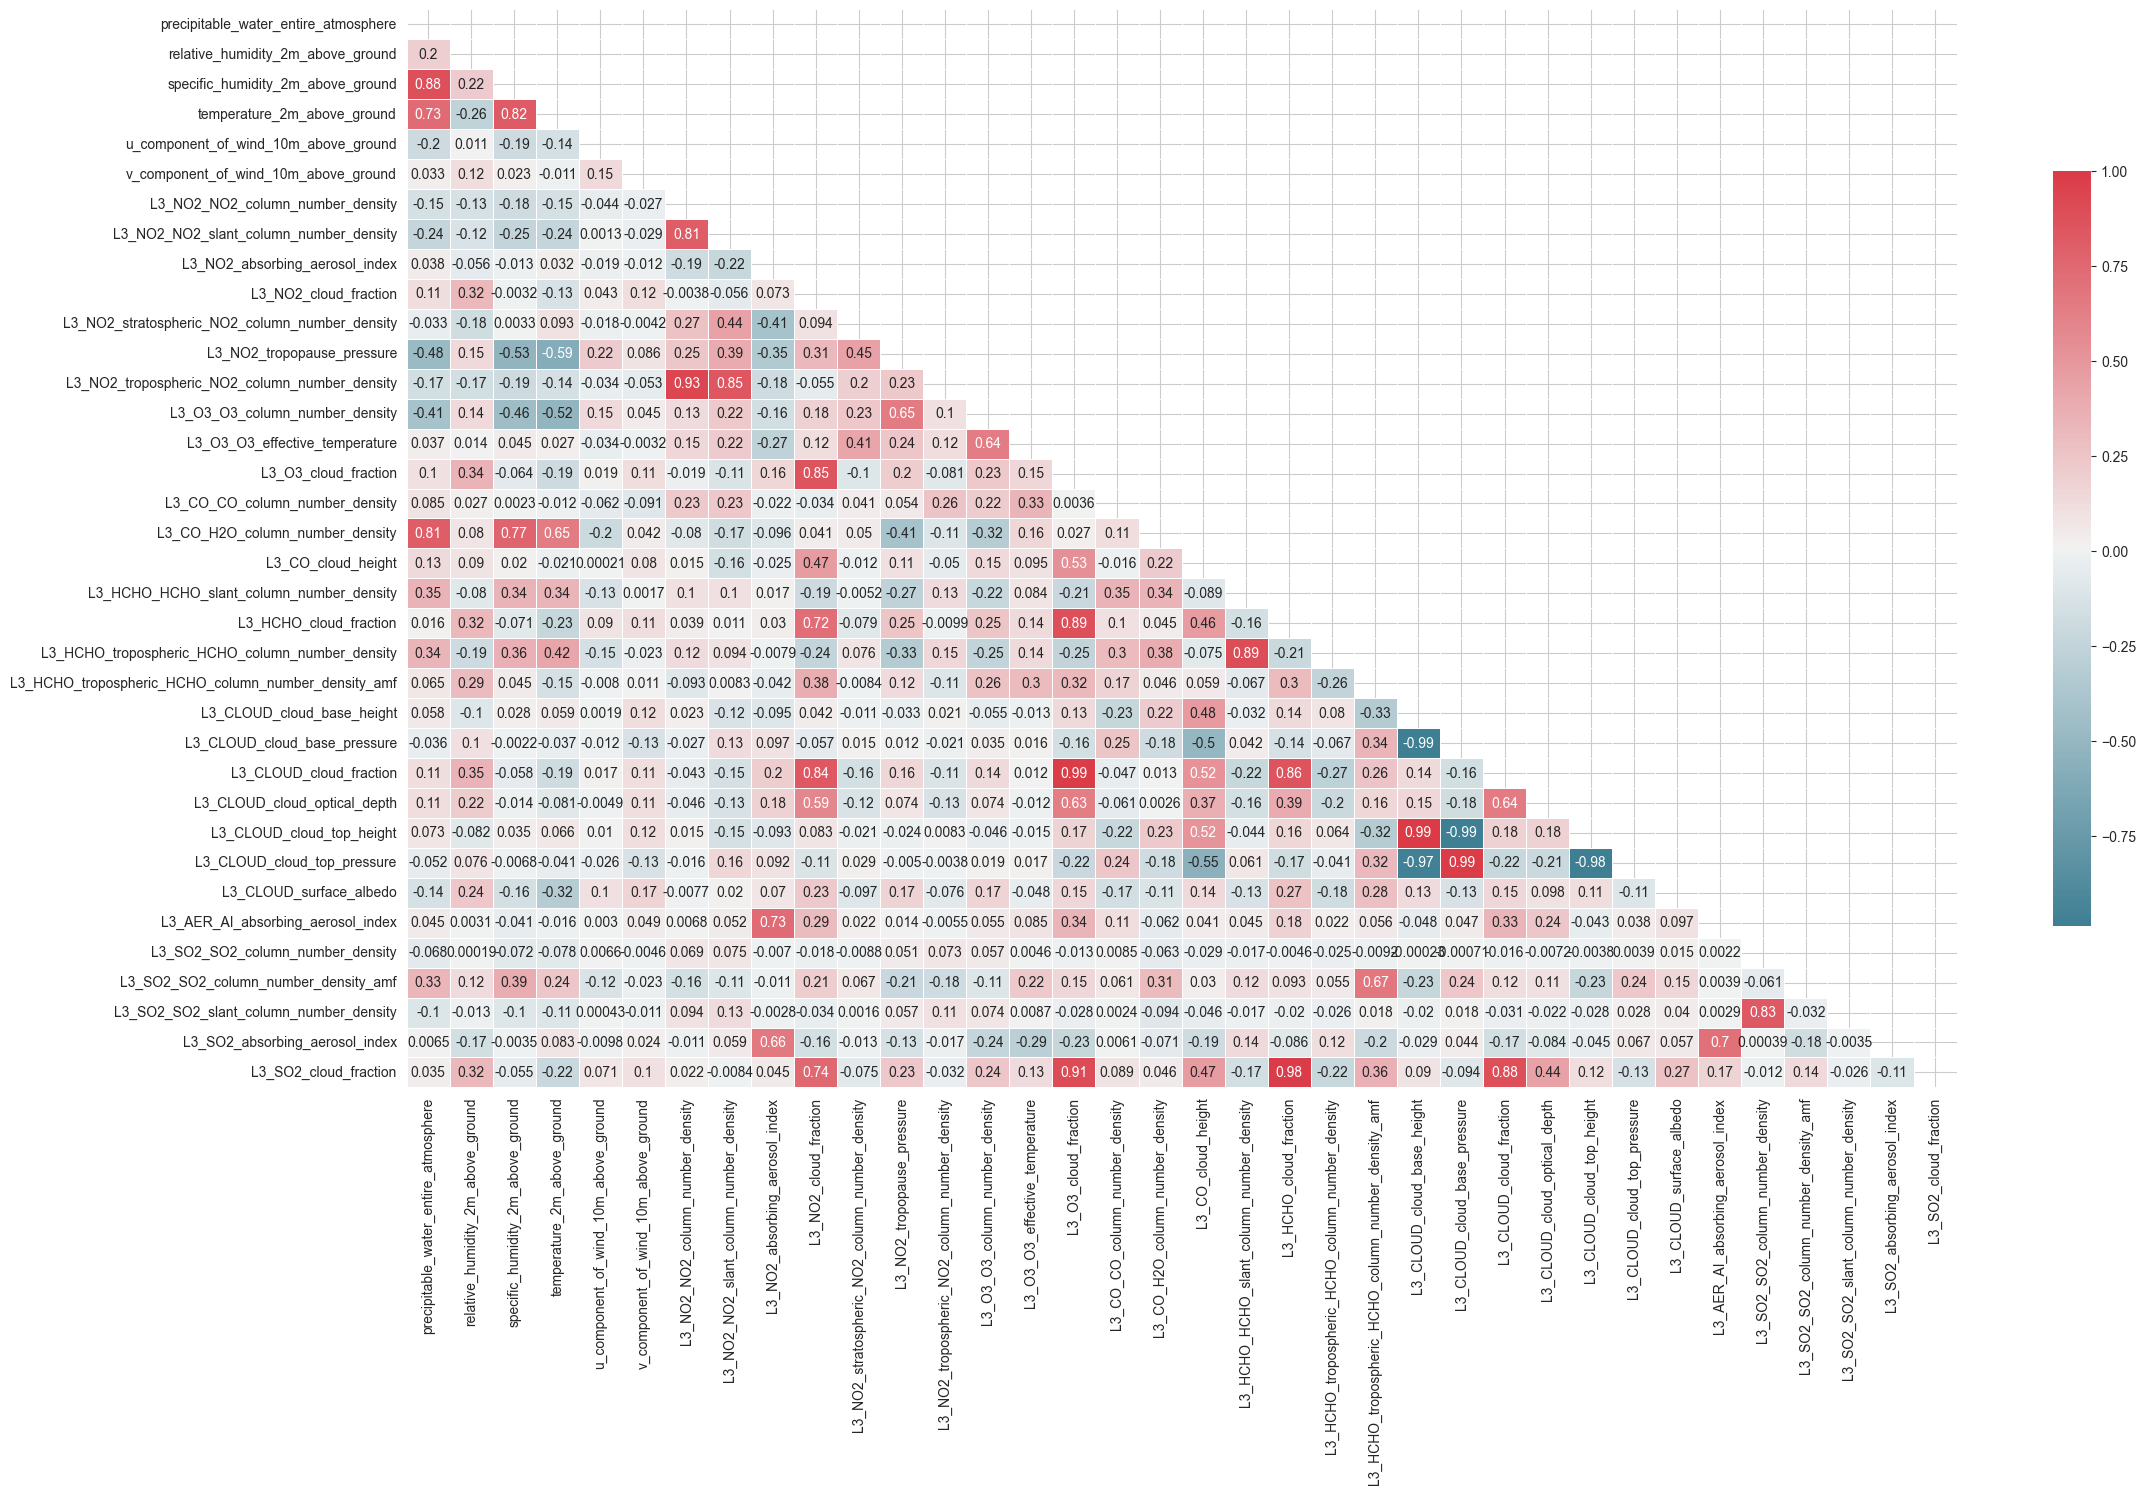

In [7]:
plt.rcParams['figure.figsize'] = 25, 14
sns.set_style('whitegrid')

# Compute correlations
correlations = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=1, annot=True,
            linewidths=.5, cbar_kws={"shrink": .7});

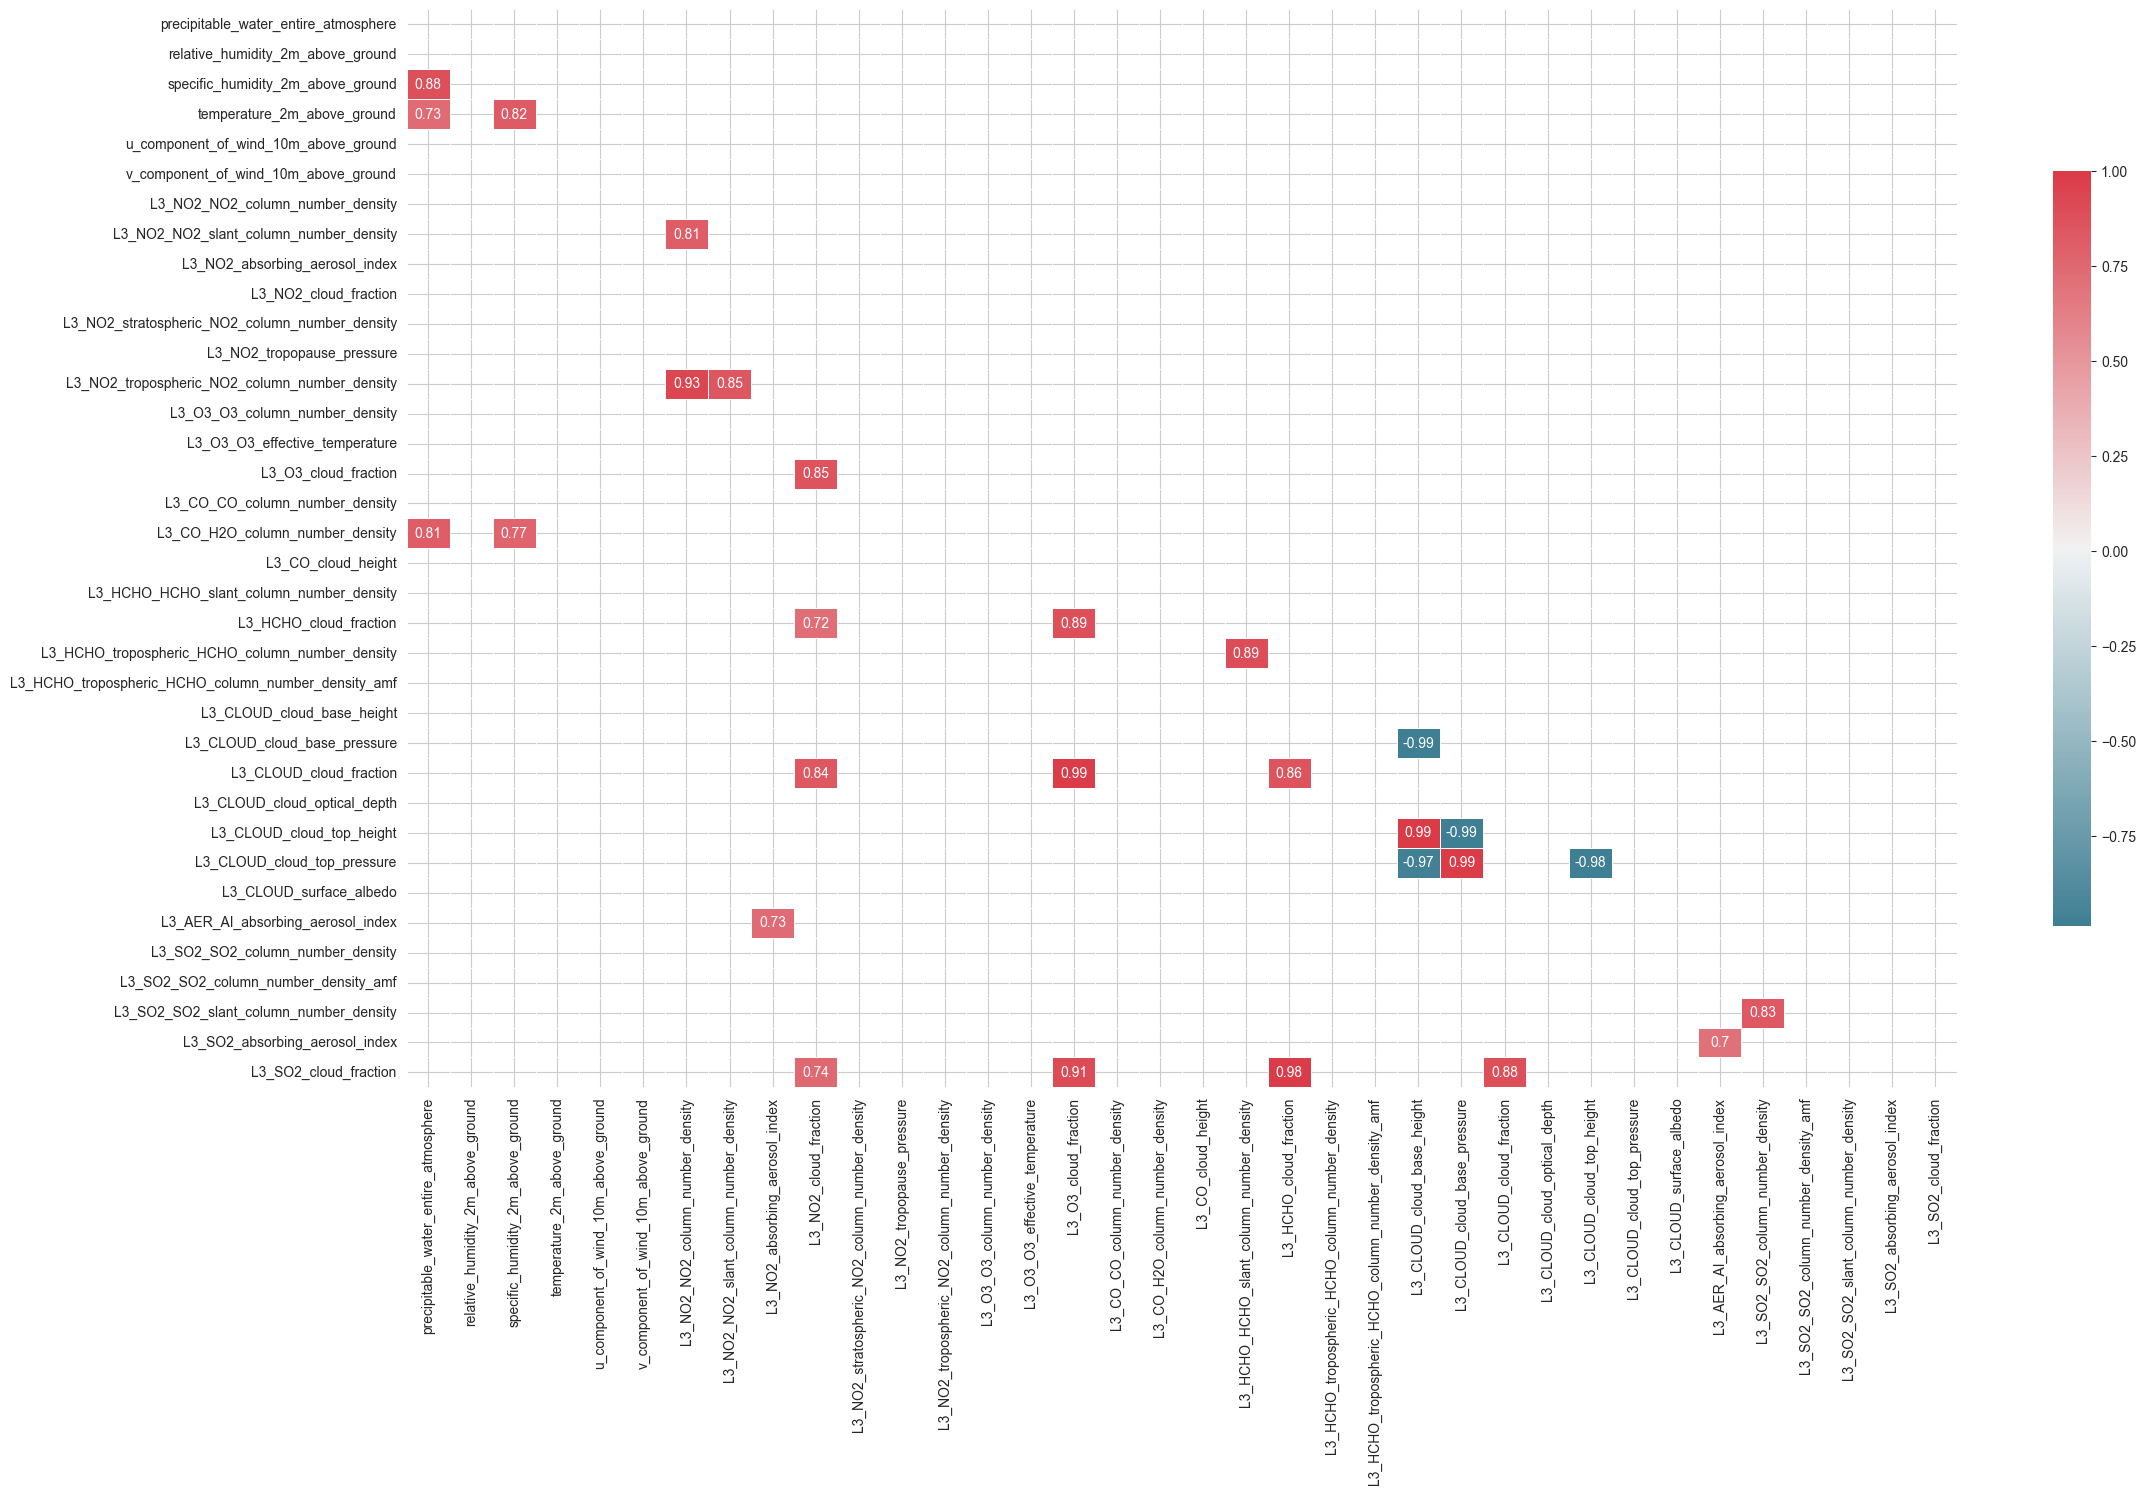

In [8]:
plt.rcParams['figure.figsize'] = 25, 14
sns.set_style('whitegrid')

# Compute correlations
correlations = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix_mod, mask=mask, cmap=cmap, vmax=1, annot=True,
            linewidths=.5, cbar_kws={"shrink": .7});

In [9]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

# Drop features 
df_new = df.drop(to_drop, axis=1)
#df.drop(to_drop, axis=1, inplace=True)
#df.info()

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 20 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   precipitable_water_entire_atmosphere                 30557 non-null  float64
 1   relative_humidity_2m_above_ground                    30557 non-null  float64
 2   u_component_of_wind_10m_above_ground                 30557 non-null  float64
 3   v_component_of_wind_10m_above_ground                 30557 non-null  float64
 4   L3_NO2_NO2_column_number_density                     28368 non-null  float64
 5   L3_NO2_absorbing_aerosol_index                       28368 non-null  float64
 6   L3_NO2_cloud_fraction                                28368 non-null  float64
 7   L3_NO2_stratospheric_NO2_column_number_density       28367 non-null  float64
 8   L3_NO2_tropopause_pressure                           28367 non-nul

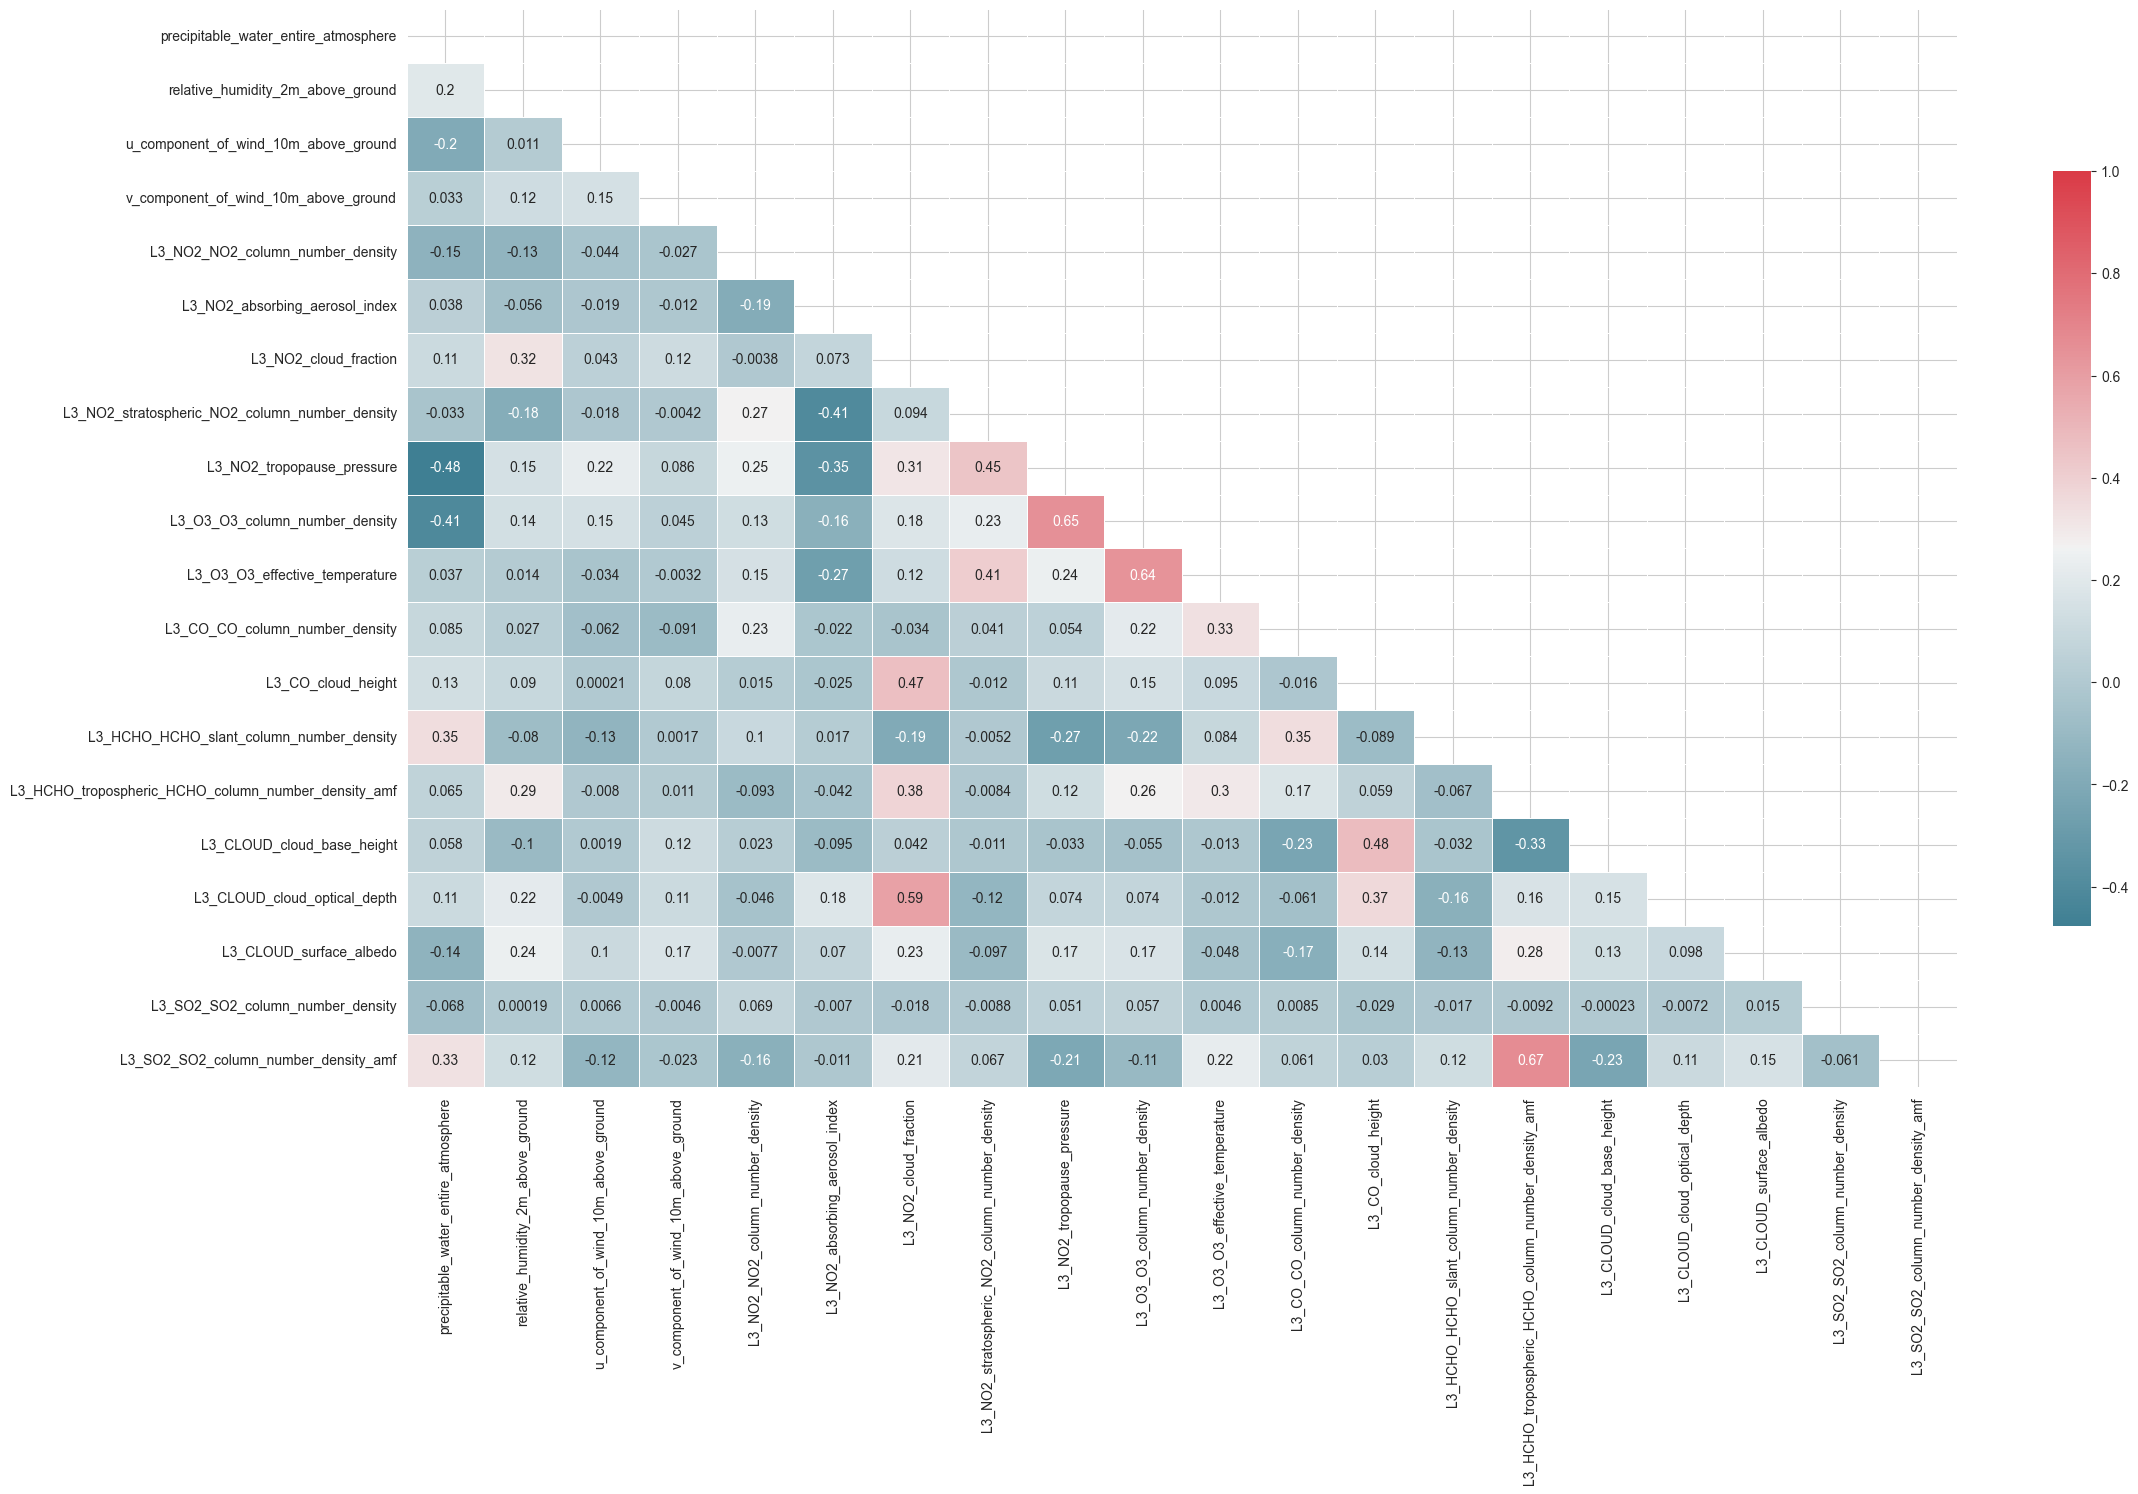

In [10]:
plt.rcParams['figure.figsize'] = 25, 14
sns.set_style('whitegrid')

# Compute correlations
correlations = df_new.corr()
correlations_big = correlations[abs(correlations) > 0.7]

# Generate a mask for the upper triangle
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=1, annot=True,
            linewidths=.5, cbar_kws={"shrink": .7});

In [11]:
more_col_todrop = ['precipitable_water_entire_atmosphere',
                   'specific_humidity_2m_above_ground',
                   'L3_NO2_NO2_column_number_density',
                   'L3_NO2_NO2_slant_column_number_density',
                   'L3_NO2_absorbing_aerosol_index',
                   'L3_NO2_cloud_fraction', 'L3_O3_cloud_fraction',
                   'L3_HCHO_HCHO_slant_column_number_density',
                   'L3_HCHO_cloud_fraction', 'L3_CLOUD_cloud_base_height',
                   'L3_CLOUD_cloud_base_pressure',
                   'L3_CLOUD_cloud_fraction',
                   'L3_CLOUD_cloud_top_height',
                   'L3_AER_AI_absorbing_aerosol_index',
                   'L3_SO2_SO2_column_number_density'
                    ]



In [12]:
# Impute data, where values is missing with most frequent values  
df = air_pollution.copy()

imp_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_imputed = pd.DataFrame(imp_freq.fit_transform(df))
df_imputed.columns = df.columns
df_imputed.index = df.index

## Data analysis

### Split data in train and test set 

In [13]:
# Define features and target and split data into train and test set
drop_features = ["target", "target_min", "target_max", "target_variance"]
X = df_imputed.drop(columns=drop_features, axis=1)
y = df_imputed["target"]

# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=RSEED)

# Bug report: train_test_split(stratify=y) does not work if y ist stratified! Why?

### Hypothetical model

In [14]:
# Hypothesis?

# Create a test regression dataset, used as baseline model
from sklearn.datasets import make_regression
n_samples = X.shape[0]
n_features = X.shape[1]
n_informative_features = 1 # baseline model, no feature correlated with target
#n_informative_features = X.shape[1] # optimal model, all features correlated with target

X_baseline,y_baseline = make_regression(n_samples=n_samples, n_features=n_features, n_informative=n_informative_features)#, random_state=RSEED)

linear_mdl_baseline = LinearRegression()
linear_mdl_baseline.fit(X_baseline,y_baseline)

y_pred_baseline = linear_mdl_baseline.predict(X_baseline)
rmse = mean_squared_error(y_baseline, y_pred_baseline, squared=False)
print("Linear regression - Hypothetical")
print("RSME: ", rmse)

Linear regression - Hypothetical
RSME:  2.716975543416587e-14


### Baseline model

In [ ]:
to_drop = ["Date", "Place_ID X Date", "Place_ID"]
all_features = X_train.drop(columns=to_drop, axis=1)
n_features = all_features.columns

all_rmses = []

for feature in n_features:
    
    X_train_baseline = X_train[[feature]]
    X_test_baseline = X_test[[feature]]

    # Linear regression model
    linear_mdl = LinearRegression()
    linear_mdl.fit(X_train_baseline,y_train)

    y_pred_train = linear_mdl.predict(X_train_baseline)
    y_pred = linear_mdl.predict(X_test_baseline)

    rmse = mean_squared_error(y_test, y_pred, squared=False)

    #all_features.append(feature)
    all_rmses.append([feature, rmse])

print(pd.DataFrame(all_rmses))

In [28]:
all_rmses = pd.DataFrame(all_rmses).sort_values(by=1, ascending=True)
print(all_rmses)

                                                    0          1
1                           L3_AER_AI_sensor_altitude  44.069480
38    L3_HCHO_tropospheric_HCHO_column_number_density  44.171960
40                   L3_NO2_NO2_column_number_density  44.215389
41             L3_NO2_NO2_slant_column_number_density  44.292788
32           L3_HCHO_HCHO_slant_column_number_density  44.627603
51      L3_NO2_tropospheric_NO2_column_number_density  44.728722
24                     L3_CO_CO_column_number_density  45.242475
4                       L3_AER_AI_solar_azimuth_angle  45.573419
57                          L3_O3_solar_azimuth_angle  45.598773
21                       L3_CLOUD_solar_azimuth_angle  45.640303
36                        L3_HCHO_solar_azimuth_angle  45.774278
66                         L3_SO2_solar_azimuth_angle  45.806041
47                         L3_NO2_solar_azimuth_angle  45.807110
30                          L3_CO_solar_azimuth_angle  45.947845
11                       

In [29]:
baseline_feature = "L3_HCHO_tropospheric_HCHO_column_number_density"

X_train_baseline = X_train[[baseline_feature]]
X_test_baseline = X_test[[baseline_feature]]

In [30]:
# Linear regression model
linear_mdl = LinearRegression()
linear_mdl.fit(X_train_baseline,y_train)

y_pred_train = linear_mdl.predict(X_train_baseline)
y_pred = linear_mdl.predict(X_test_baseline)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Linear regression - Baseline")
print("RSME: ", rmse)
print("_"*10)

Linear regression - Baseline
RSME:  44.17195972041468
__________


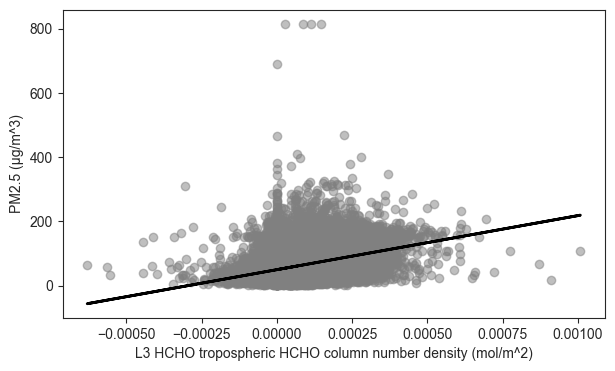

In [47]:
# Plot data with regression line
sns.set_style("ticks")
plt.rcParams["figure.figsize"] = (7,4)

plt.scatter(X_train_baseline, y_train, color='grey', alpha=0.5)
plt.plot(X_train_baseline, y_pred_train, '-', color='black', linewidth=2)
plt.ylabel('PM2.5 (µg/m^3)')
plt.xlabel('L3 HCHO tropospheric HCHO column number density (mol/m^2)');

### Train and test models

In [ ]:
# Linear regression model
linear_mdl = LinearRegression()
linear_mdl.fit(X_train,y_train)

y_pred_train = linear_mdl.predict(X_train)
y_pred = linear_mdl.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Linear regression")
print("RSME: ", rmse)
print("_"*10)

# Decision tree regressor
tree_mdl = DecisionTreeRegressor()
tree_mdl.fit(X_train,y_train)

y_pred_train = tree_mdl.predict(X_train)
y_pred = tree_mdl.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Decision tree regressor")
print("RSME: ", rmse)
print("_"*10)

# Random forest regressor
forest_mdl = RandomForestClassifier()
forest_mdl.fit(X_train,y_train)

y_pred_train = forest_mdl.predict(X_train)
y_pred = forest_mdl.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Random forest regressor")
print("RSME: ", rmse)
print("_"*10)

ValueError: could not convert string to float: 'YAXBMZ6 X 2020-02-26'

In [ ]:
intercept = linear_mdl.intercept_
slope = linear_mdl.coef_[0]
print("Linear regression")
print("Intercept: ", intercept)
print("Slope: ", slope)

# X = X
# Y = X*slope + intercept

### Optimize models